***LIBRARIES***

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud



***LOAD DATASET***

In [27]:
data=pd.read_csv("/content/sample_data/netflix_titles.csv")
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


***EXPLORING DATASET***

In [6]:
print("The Shape Of Dataset is: ",data.shape)

The Shape Of Dataset is:  (8807, 12)


In [7]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
print("Statistics of Dataset\n\n")
data.describe()

Statistics of Dataset




,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


***CLEANING***

In [10]:
#CHECKING FOR DUPLICATE ROWS
print(data[data.duplicated()])

print("NO DUPLICATE ROWS FOUND")

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []
NO DUPLICATE ROWS FOUND


In [11]:
print("Checking for null values\n\n")
data.isnull()

Checking for null values




,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [13]:
data.dropna(subset=['rating'], inplace=True)
data.dropna(subset=['duration'], inplace=True)
data.dropna(subset=['date_added'], inplace=True)
data.dropna(subset=['country'], inplace=True)
data.dropna(subset=['cast'], inplace=True)
data.dropna(subset=['director'], inplace=True)
data.shape

(5332, 12)

In [14]:
print("Data set cleaned and all rows that contained null values have been removed\n\n")
data.isnull().sum()


Data set cleaned and all rows that contained null values have been removed




show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

***ANALYSIS***

In [15]:
print("What are the type of Watchlist we have\n\n")

grouped = data.groupby('type')
type_counts = grouped.size()
print(type_counts)

What are the type of Watchlist we have


type
Movie      5185
TV Show     147
dtype: int64


In [16]:
print("Which country produces the highest No of movies and TV shows aling with it's Count \n\n")


country_counts = data['country'].value_counts()
most_producing_country = country_counts.idxmax()
content_count = country_counts.max()

print("The country which produces the highest number of movies and TV shows is :",most_producing_country,content_count)

Which country produces the highest No of movies and TV shows aling with it's Count 


The country which produces the highest number of movies and TV shows is : United States 1846


In [17]:
print("In Which Year Was The Highest No Of Movies and Tv shows Were Released ?\n\n")

yearly_counts = data.groupby(['release_year', 'type']).size().unstack()

year_with_highest_movies = yearly_counts['Movie'].idxmax()
year_with_highest_tv_shows = yearly_counts['TV Show'].idxmax()

print(f"The year with the highest number of movies released: {year_with_highest_movies}")
print(f"The year with the highest number of TV shows released: {year_with_highest_tv_shows}")

In Which Year Was The Highest No Of Movies and Tv shows Were Released ?


The year with the highest number of movies released: 2017
The year with the highest number of TV shows released: 2020


In [18]:
print("Show only the Titles of all TV Shows that were released in India only.\n\n")

tv_shows_in_india = data[(data['type'] == 'TV Show') & (data['country'] == 'India')]

tv_show_titles_in_india = tv_shows_in_india['title']

tv_show_titles_list = tv_show_titles_in_india.tolist()

for title in tv_show_titles_in_india:
    print(title)

Show only the Titles of all TV Shows that were released in India only.


Navarasa
Pitta Kathalu
Paava Kadhaigal
Jamtara - Sabka Number Ayega
GHOUL
7 (Seven)
Th Eena Meena Deeka Chase Comedy Show


In [19]:
print("What is the maximum duration of a Movie/Show on Netflix ?.\n\n")

max_duration = data['duration'].max()

print(f"The maximum duration of a Movie/Show on Netflix is: {max_duration} minutes.")

What is the maximum duration of a Movie/Show on Netflix ?.


The maximum duration of a Movie/Show on Netflix is: 99 min minutes.


In [20]:
print(" In how many movies/shows, Tom Cruise was cast ?\n\n")

for index, row in data.iterrows():
    cast = row['cast']
    title = row['title']

    # Check if 'Tom Cruise' is in the cast
    if 'Tom Cruise' in cast:
        print(f"Tom Cruise is part of the cast in the movie: {title}")

 In how many movies/shows, Tom Cruise was cast ?


Tom Cruise is part of the cast in the movie: Magnolia
Tom Cruise is part of the cast in the movie: Rain Man


In [25]:
print(" Name of Director who got the highest number of movies/tv shows published \n\n")
dict_1={}

for index, row in data.iterrows():
    director = row['director'].strip()  # Remove leading/trailing spaces

    if director:
        if director in dict_1:
            dict_1[director] += 1
        else:
            dict_1[director] = 1

# Print the director count dictionary
print(dict_1)

max_count_director = max(dict_1, key=dict_1.get)
print("\nDirector Name Who's have the highest Number of movies published:  ",max_count_director)

{'Haile Gerima': 1, 'Andy Devonshire': 1, 'Theodore Melfi': 1, 'Christian Schwochow': 1, 'S. Shankar': 1, 'Dennis Dugan': 4, 'Scott Stewart': 2, 'Robert Luketic': 6, 'George Nolfi': 1, 'Steven Spielberg': 11, 'Jeannot Szwarc': 1, 'Joe Alves': 1, 'Joseph Sargent': 1, 'Daniel Espinosa': 1, 'Antoine Fuqua': 4, 'Toshiya Shinohara': 7, 'Masahiko Murata': 4, 'Hajime Kamegaki': 2, 'Hirotsugu Kawasaki': 1, 'Toshiyuki Tsuru': 1, 'Tensai Okamura': 2, 'Kemi Adetiba': 3, 'Cedric Nicolas-Troyan': 1, 'JJC Skillz, Funke Akindele': 1, 'Alice Waddington': 1, 'Raja Gosnell': 4, 'Stephen Kijak': 1, 'Lijo Jose Pellissery': 1, 'David de Vos': 1, 'Rahul Rawail': 1, 'Jane Campion': 3, 'Nagesh Kukunoor': 4, 'Shanker Raman': 1, 'Vidhu Vinod Chopra': 1, 'Mark Rosman': 1, 'Lasse Hallström': 6, 'Ridley Scott': 2, 'Neill Blomkamp': 2, 'Phillip Noyce': 3, 'Renny Harlin': 3, 'Anthony Minghella': 2, 'Simon Wincer': 3, 'Spike Lee': 5, 'Sebastián Schindel': 3, 'Steven C. Miller': 3, 'Richard LaGravenese': 2, 'Martin Ca

In [33]:
print(" How many TV Shows got the 'R' rating, after year 2018 ? \n\n")

filtered_shows = data[(data['rating'] == 'R') & (data['release_year'] > 2018)]

count=len(filtered_shows)

print("The No Of Shows That Got Rating 'R' after 2018 are : ",count)

 How many TV Shows got the 'R' rating, after year 2018 ? 


The No Of Shows That Got Rating 'R' after 2018 are :  108


In [37]:
print(" What are the different Ratings defined by Netflix ? \n\n")

ratings=data['rating'].unique()

for i in ratings:
  print(i)

 What are the different Ratings defined by Netflix ? 


PG-13
TV-MA
PG
TV-14
TV-PG
TV-Y
TV-Y7
R
TV-G
G
NC-17
74 min
84 min
66 min
NR
nan
TV-Y7-FV
UR


In [44]:
print("All the genres and the no of movie count that fall in each category\n\n")

genre_counts = {}

# Iterate through each row
for index, row in data.iterrows():
    genres = row['listed_in'].split(',')  # Split genres by comma
    for genre in genres:
        genre = genre.strip() # Remove leading/trailing spaces
        #print(genre)
        if genre not in genre_counts:
            genre_counts[genre] = 1
        else:
            genre_counts[genre] += 1

# Print the genre counts
for genre, count in genre_counts.items():
    print(f"{genre}: {count} movies")

All the genres and the no of movie count that fall in each category


Documentaries: 869 movies
International TV Shows: 1351 movies
TV Dramas: 763 movies
TV Mysteries: 98 movies
Crime TV Shows: 470 movies
TV Action & Adventure: 168 movies
Docuseries: 395 movies
Reality TV: 255 movies
Romantic TV Shows: 370 movies
TV Comedies: 581 movies
TV Horror: 75 movies
Children & Family Movies: 641 movies
Dramas: 2427 movies
Independent Movies: 756 movies
International Movies: 2752 movies
British TV Shows: 253 movies
Comedies: 1674 movies
Spanish-Language TV Shows: 174 movies
Thrillers: 577 movies
Romantic Movies: 616 movies
Music & Musicals: 375 movies
Horror Movies: 357 movies
Sci-Fi & Fantasy: 243 movies
TV Thrillers: 57 movies
Kids' TV: 451 movies
Action & Adventure: 859 movies
TV Sci-Fi & Fantasy: 84 movies
Classic Movies: 116 movies
Anime Features: 71 movies
Sports Movies: 219 movies
Anime Series: 176 movies
Korean TV Shows: 151 movies
Science & Nature TV: 92 movies
Teen TV Shows: 69 movies


*** VISUALIZATION ***

Genre Distribution Bar Chart




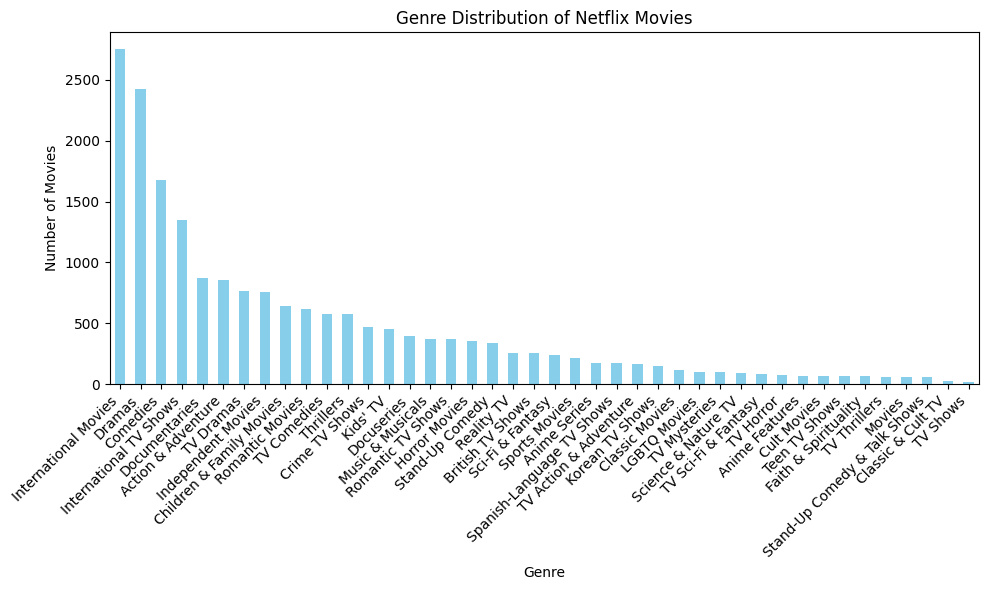

In [49]:
all_genres = [genre.strip() for genres in data['listed_in'] for genre in genres.split(',')]
genre_counts = pd.Series(all_genres).value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Distribution of Netflix Movies')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


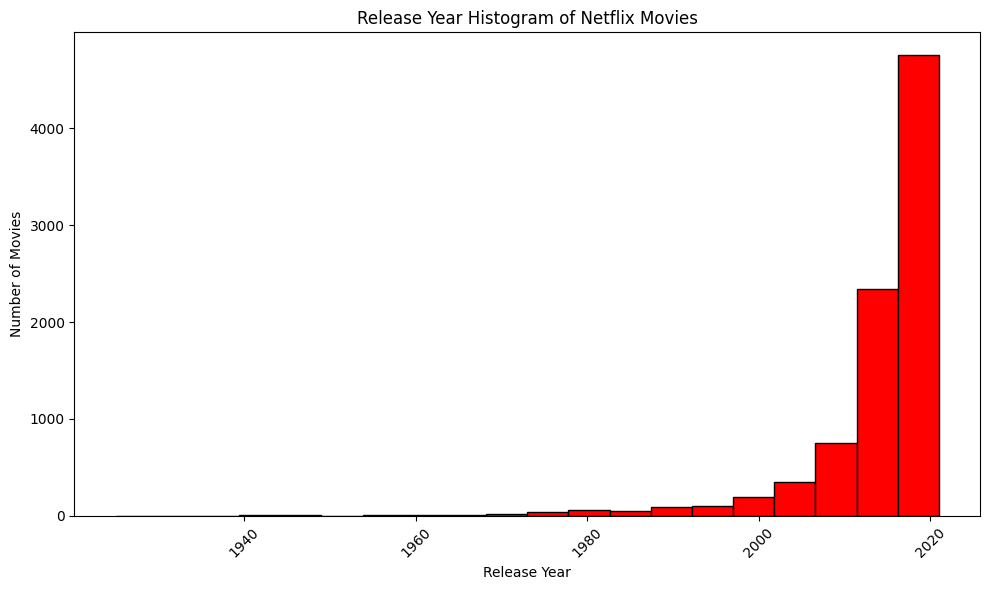

In [51]:
plt.figure(figsize=(10, 6))
plt.hist(data['release_year'], bins=20, color='red', edgecolor='black')
plt.title('Release Year Histogram of Netflix Movies')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

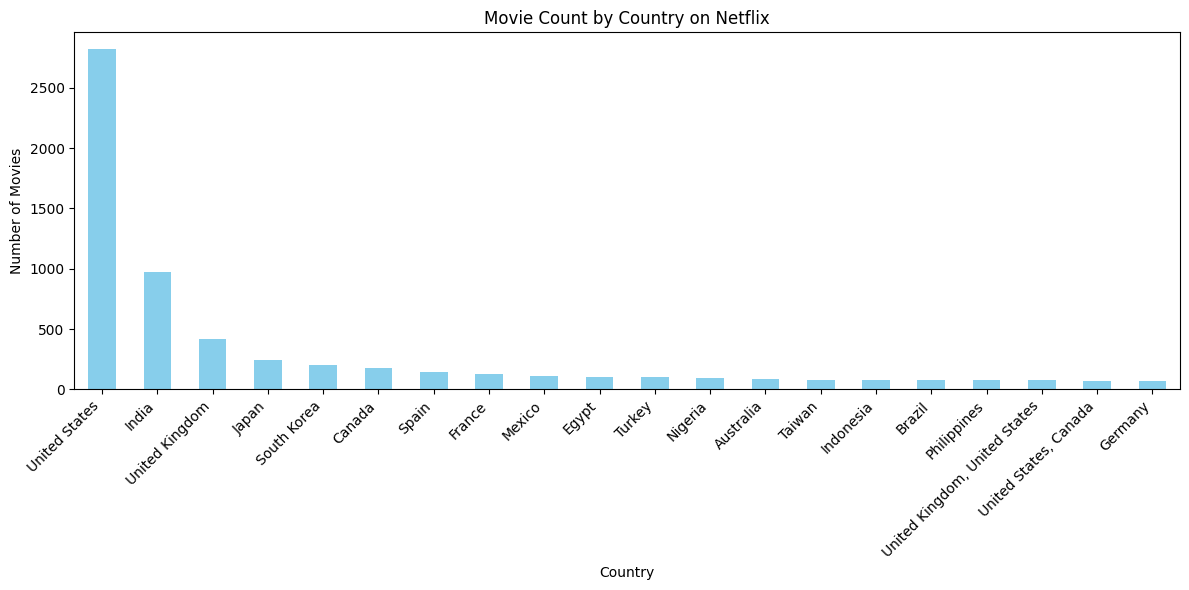

In [55]:
country_counts = data['country'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
country_counts[:20].plot(kind='bar', color='skyblue')
plt.title('Movie Count by Country on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

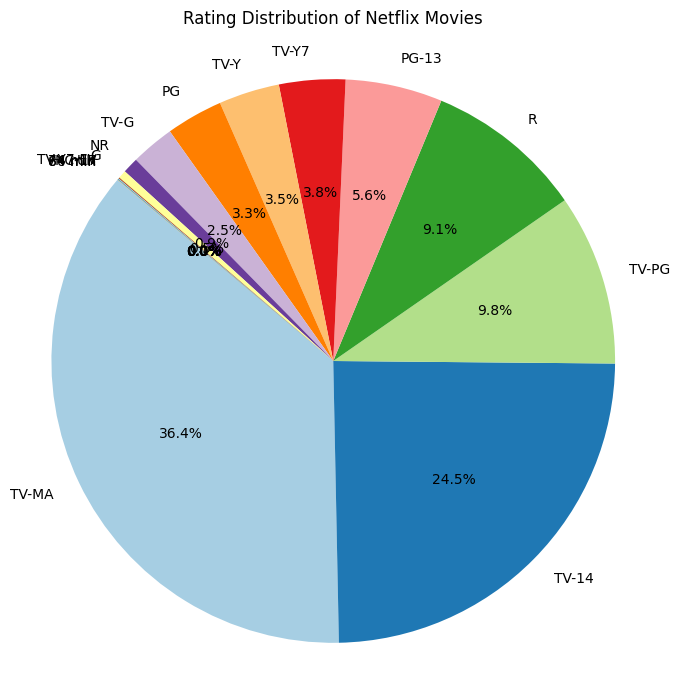

In [60]:
rating_counts = data['rating'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Rating Distribution of Netflix Movies\n')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

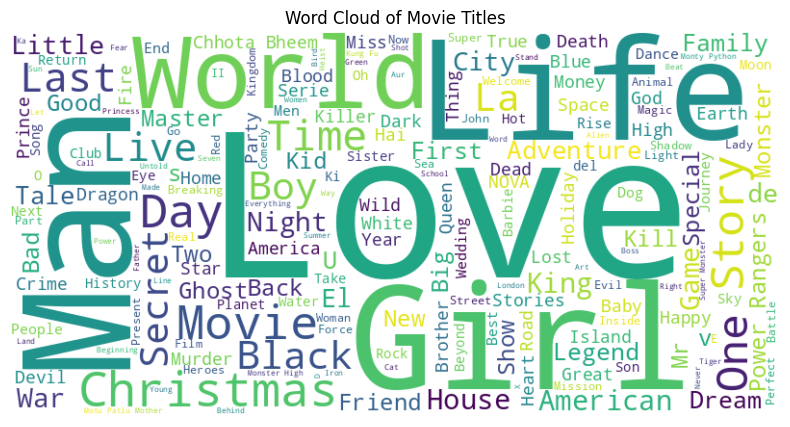

In [65]:


# Combine all movie titles into a single string
all_titles = ' '.join(data['title'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

# Create a plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles')
plt.show()
